# **Detecção de cartão de credito Fraudolento usando Scikit-Learn e Snap ML**

Esse notebook é um exercico de consodilidação do topico anterior de modelo de classificação para reconhecimento de transação cartão de credito fraudolento.

Usaremos dois modelos : Árvore de Decisão  an Support Vector Machine. 

Obs.: Usaremos todo o dataset para treinar cada modelo, nele temos informaçoes sobre transações feitas por cartão de creditos em Setempro de 2013 pela carteira Europeia.

**Objetivo : Usar o modelo treinado para verificar se a transação é legitima ou não.**

Problema :

    Imagine que você trabalha para uma instituição finaceira e parte do seu trabalho é construir modelos e predizer se a transação do cartão de credito é fraudolenta ou não. Podemos modelar esse problema em um problema de classifcação binaria( 0 ou 1), onde 

0 -> Significa que não é fraudolenta.

1 -> Significa que a transação é fraudolenta.

# Introdução 

In [1]:
# install the opendatasets package
#  ---->>>>>>>>>> !pip install opendatasets
# In the current exercise session, you will practice not only the Scikit-Learn Python interface, but also the Python API offered by the Snap Machine Learning (Snap ML) library.
# Snap ML is a high-performance IBM library for ML modeling.
# It provides highly-efficient CPU/GPU implementations of linear models and tree-based models. 
# Snap ML not only accelerates ML algorithms through system awareness, but it also offers novel ML algorithms with best-in-class accuracy. 
# For more information, please visit snapml information page.

# Snap ML está disponivel em PyPI. Para instalar apenas  execute o comando abaixo(Lembre de tirar o "#").
#  !pip install snapml

# Bibliotecas

In [2]:
# Import the libraries we need to use in this lab
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
import time
import warnings
warnings.filterwarnings('ignore')

# Analisando os dados:

In [3]:
dados =  pd.read_csv('creditcard.csv')   # Lendo os dados de entrada.
# Obs: o arquivo foi baixado direto do Kaggle dataset (https://www.kaggle.com/mlg-ulb/creditcardfraud)

In [4]:
dados

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Entendendo :

Cada linha dos dados é um cartão de credito .

Cada coluna dos dados é uma variavel do cartão de credito. A ultima variavel chamada "class" é a varivel target(objetivo) é essa variavel que queremos predizer. Onde podemos observar que ela varia em 0 e 1, pois é uma variavel binaria e obedece a regra comentada na introdução. 

Note que : Por questão de confidencialidade os nomes originais das característica estão anónimas.

In [5]:
# Uma forma de verificar quantos tipos diferente de números temos em uma colunas 
# é usando o metodo unique.
dados.Class.unique()

array([0, 1], dtype=int64)

Note acima que a colunas Class tem apenas zeros e um.

Podemos também determinar quantas vezes cada um deles aparece, usando a função "values_count()"

In [6]:
dados.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Caso você queira apenas os valores, então use ".values" no final

In [7]:
dados.Class.value_counts().values

array([284315,    492], dtype=int64)

Podemos visualizar melhore em um grafico 

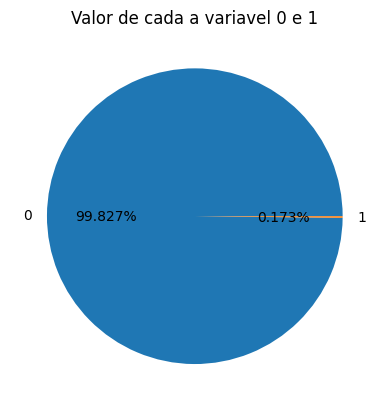

In [8]:
# plot 
fig, ax = plt.subplots()
ax.pie( 
       dados.Class.value_counts().values, #  frequencia/Valor de cada que o 0 e 1 aparece  
       labels = dados.Class.unique(),     #  O nome das variavel, nesse caso 0 e 1
       autopct='%1.3f%%')
ax.set_title('Valor de cada a variavel 0 e 1')
plt.show()

Como podemos ver na grafico acime temos duas variavels 0 e 1 . 

Fica mais evidente que precisamso de um modelo binario, mas devemos prestar atenção no fato de nosso dados estarem totalmente desbalanceado, pois não temos um boa amostrarem para quando os dados são fraudolentos. 

PARA ISSO DEVEMOS ...

Outra variavel que é de nosso interesse é o valor(AMOUNT). Uma boa forma de visulalizar é usando o histograma.

In [9]:
dados.Amount

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284807, dtype: float64

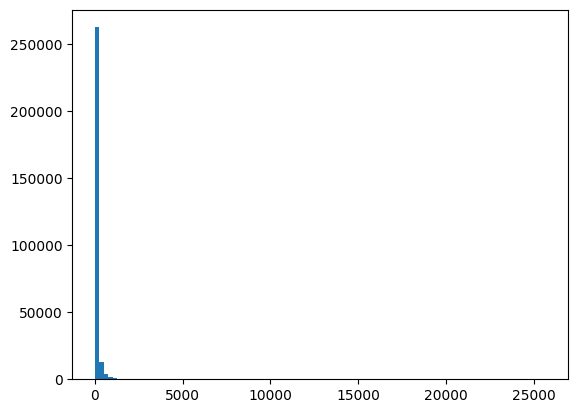

Valor mínimo é  0.0
Valor máximo é  25691.16
90% da transação tem valor menos ou igual a  203.0


In [10]:
plt.hist(dados.Amount.values,100, histtype='bar' )
plt.show()
print("Valor mínimo é ", np.min(dados.Amount.values))
print("Valor máximo é ", np.max(dados.Amount.values))
print("90% da transação tem valor menos ou igual a ", np.percentile(dados.Amount.values, 90))

# Pre-procesamento dos dados.

Agora vamos preparar os dados para realiza o treino.

In [11]:
# Para acelerar a convergencia do treinamento , iremos normalizar e padronizar os valores(scaling).
# no plot da amount podemos ver que 90% dado valores estão entorno de 0 a 203
#   --- >>> dados.iloc[:, 1:30] esses são os dados sem a colunas "Class" e tempo
dados.iloc[:, 1:30] = StandardScaler().fit_transform(dados.iloc[:, 1:30])
data_matrix         = dados.values
data_matrix # temos umas matriz com todos os valores inclusindo class e tempo.

array([[ 0.00000000e+00, -6.94242321e-01, -4.40749246e-02, ...,
        -6.37811507e-02,  2.44964263e-01,  0.00000000e+00],
       [ 0.00000000e+00,  6.08496328e-01,  1.61175920e-01, ...,
         4.46075177e-02, -3.42474541e-01,  0.00000000e+00],
       [ 1.00000000e+00, -6.93500463e-01, -8.11577826e-01, ...,
        -1.81020827e-01,  1.16068593e+00,  0.00000000e+00],
       ...,
       [ 1.72788000e+05,  9.80023736e-01, -1.82433725e-01, ...,
        -8.04671974e-02, -8.18393021e-02,  0.00000000e+00],
       [ 1.72788000e+05, -1.22755392e-01,  3.21250341e-01, ...,
         3.16686777e-01, -3.13248531e-01,  0.00000000e+00],
       [ 1.72792000e+05, -2.72330934e-01, -1.14898979e-01, ...,
         4.13499858e-02,  5.14355311e-01,  0.00000000e+00]])

In [12]:
# Vamos criar uma variavel para armazenar apenas os valores que serão usado com variavel independente.
X = data_matrix[:,1:30]
# Variavel dependente.
Y = data_matrix[:, 30]

In [13]:
# Normalizando os dados.
X = normalize(X, norm="l1") # poderia ser l1 ou l2 , pelo que entendi cada um deles representa .....
X

array([[-0.05617142, -0.00356612,  0.13534477, ...,  0.02677257,
        -0.00516056,  0.01982016],
       [ 0.0617268 ,  0.01634993,  0.01113799, ..., -0.00225765,
         0.00452505, -0.03474114],
       [-0.02686875, -0.0314435 ,  0.0453095 , ..., -0.00531318,
        -0.00701341,  0.04496923],
       ...,
       [ 0.0576644 , -0.01073436, -0.12610577, ...,  0.0006494 ,
        -0.00473467, -0.00481541],
       [-0.00560415,  0.01466604,  0.02115195, ...,  0.01230823,
         0.0144577 , -0.01430073],
       [-0.02071875, -0.00874144,  0.03529059, ..., -0.00045525,
         0.00314588,  0.03913181]])

# Separando a parte de treino e de teste

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)       
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (199364, 29) Y_train.shape= (199364,)
X_test.shape= (85443, 29) Y_test.shape= (85443,)


# Arvore de Decisão

## Arvore de Decisão  com Sckit-Learn

In [15]:
w_train = compute_sample_weight('balanced', y_train)     # ESTUDAR ISSO AQUI......

In [16]:
# Chamando o modelo de arvore de desição  a parti do scikit-learn.
from sklearn.tree import DecisionTreeClassifier

In [17]:
sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state=35) 
# max_depth ---->> A profundidade máxima da árvore que está ligada com a quantidade de nodos=variaveis independente.

In [18]:
# Treinando 
t0 = time.time()                                              # Tempo inicial 
sklearn_dt.fit(X_train, y_train, sample_weight=w_train)       # TREINO 
sklearn_time = time.time()-t0
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  2.63785


## Arvore de Decisão  com Snap ML

In [19]:
from snapml import DecisionTreeClassifier
# uma vantagem desse pacote é o fato de ele oferecer uma opção de se usar a GPU.

In [20]:
# Para configura o numero de threads que é usado durante o tempo de treino , configure o parâmetro n_jobs.
snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45, n_jobs=4)

In [21]:
# TREINO
t0 = time.time()
snapml_dt.fit(X_train, y_train, sample_weight=w_train)
snapml_time = time.time()-t0
print("[Snap ML] Training time (s):  {0:.5f}".format(snapml_time))

[Snap ML] Training time (s):  0.18542


PODEMOS VER CLARAMENTE QUE O TEMPO DE TREINO É BEM MENOR NESSA CASO.

## Comparando os modelos

In [22]:
# Snap ML vs Scikit-Learn training speedup
training_speedup = sklearn_time/snapml_time
print('[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : {0:.2f}x '.format(training_speedup))

[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : 14.23x 


In [23]:
# Vamos fazer a predição com o dados de test e ver se o modelor esta bom.
sklearn_pred = sklearn_dt.predict_proba(X_test)[:,1]
# Aqui vamos verificar os acertos 
sklearn_roc_auc = roc_auc_score(y_test, sklearn_pred)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc))

[Scikit-Learn] ROC-AUC score : 0.937


Vamos fazer o mesmo para o Snap ML

In [24]:
snapml_pred    = snapml_dt.predict_proba(X_test)[:,1]
snapml_roc_auc = roc_auc_score(y_test, snapml_pred)   
print('[Snap ML] ROC-AUC score : {0:.3f}'.format(snapml_roc_auc))

[Snap ML] ROC-AUC score : 0.904


     Obs ERA PARA DA O MESMO SCOR, pelo menos foi assim no exemplo que usei

# SVM MODEL

## Usando Support Vector Machine Model  com Scikit-Learn

In [25]:
from sklearn.svm import LinearSVC

In [26]:
sklearn_svm = LinearSVC(
                        class_weight ='balanced',
                        random_state = 31, 
                        loss = "hinge",
                        fit_intercept=False)

In [27]:
# Treino
t0 = time.time()
sklearn_svm.fit(X_train, y_train)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Training time (s):  {0:.2f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  2.03


## Com SNAP

In [28]:
from snapml import SupportVectorMachine

snapml_svm = SupportVectorMachine(
                                    class_weight='balanced', 
                                    random_state=25, 
                                    n_jobs=4, 
                                    fit_intercept=False)

# train an SVM model using Snap ML
t0 = time.time()
model = snapml_svm.fit(X_train, y_train)
snapml_time = time.time() - t0
print("[Snap ML] Training time (s):  {0:.2f}".format(snapml_time))

[Snap ML] Training time (s):  0.74


## Comparando 

In [29]:
# Calculando a velocidade

training_speedup = sklearn_time/snapml_time
print('[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : {0:.2f}x '.format(training_speedup))

sklearn_pred = sklearn_svm.decision_function(X_test)
snapml_pred  = snapml_svm.decision_function(X_test)
#
# Calculando a acuracia da predição
acc_sklearn  = roc_auc_score(y_test, sklearn_pred)
acc_snapml   = roc_auc_score(y_test, snapml_pred)

print("[Scikit-Learn] ROC-AUC score: {0:.3f}".format(acc_sklearn))
print("[Snap ML] ROC-AUC score: {0:.3f}".format(acc_snapml))

[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : 2.73x 
[Scikit-Learn] ROC-AUC score: 0.971
[Snap ML] ROC-AUC score: 0.972


Podemos notar que ambos oferece o mesmo score/acuracia  mas novamente com o SNAP é bem mais rapido 